<a href="https://colab.research.google.com/github/raminass/Software-Project/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Rami Nasser (raminass@gmail.com)


# Data Science in Python

## The data cycle

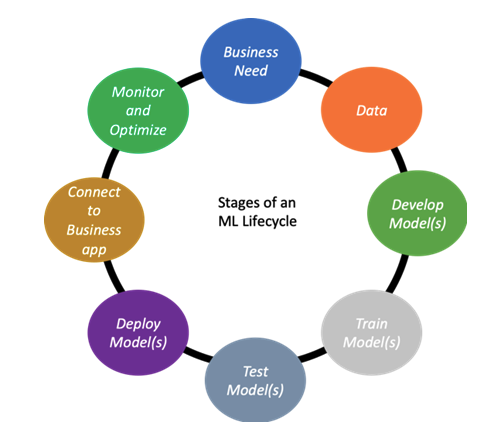

Last weeks we focused on: preprocessing, visualization & analysis

Today: ML

# Machine learning

We are given a dataset and would like to perform a task with it.

## Basic Example - House Price Prediction
Given: a dataset of N samples
$(x_1,y_1),...(x_n,y_n)$

$x - square$

$y - price$

Task: what is the price of house that has $x$ square ?

### One dimensional

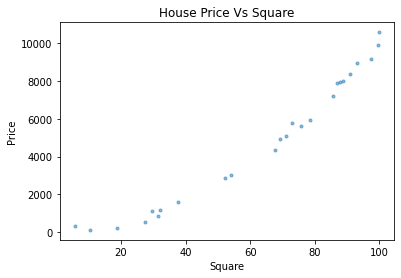

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(162)
# Create data
N = 25
x = np.random.rand(N)*100
y = x**2 + np.random.normal(1,2,size=N)*100
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('House Price Vs Square')
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

$x=60$ ?

### More Features
Now what if we know the age of the house ?

$(age,square)\rightarrow price$

In [ ]:
import plotly.express as px

# Create data
np.random.seed(162)
N = 25
x = np.random.rand(N)*100
age = np.random.rand(N)*18
y = x**2 + 0.5*age + np.random.normal(1,2,size=N)*100
colors = (0,0,0)
area = np.pi*3

#Plotting
fig = px.scatter_3d(x=x, y=age, z=y,color=y,labels={'x':'square', 'y':'age', 'z':'price'},width=800, height=500)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### High Dimensional Features
$x\in R^d$

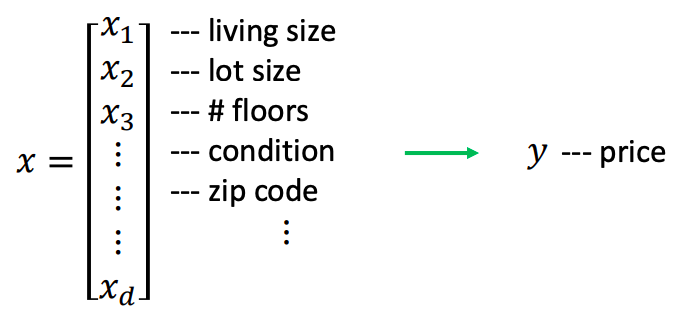

## Classical ML

![img](https://i.vas3k.ru/7w1.jpg )
<!-- <img src="https://i.vas3k.ru/7w1.jpg" width="600" height="600" /> -->




### Supervised

#### Classification
Today used for:
* Spam filtering
* Language detection
* Sentiment analysis
* Recognition of handwritten characters and numbers
* Fraud detection

Popular algorithms: Naive Bayes, Decision Tree, Logistic Regression, K-Nearest Neighbours, Support Vector Machine, DNN (Deep Neural Networks)

![](https://i.vas3k.ru/7qx.jpg)

![](https://i.vas3k.ru/7w3.jpg)

Image Classification (CIFAR10 dataset)

![](https://pytorch.org/tutorials/_images/cifar10.png)


#### Regression

Today this is used for:

* Stock price forecasts
* Demand and sales volume analysis
* Medical diagnosis
* Any number-time correlations

![](https://i.vas3k.ru/7qy.jpg)

![](https://i.vas3k.ru/7w5.jpg)

### Unsupervised

#### Clustering
Nowadays used:

* For market segmentation (types of customers, loyalty)
* To merge close points on a map
* To analyze and label new data
* To detect abnormal behavior

![](https://i.vas3k.ru/7qz.jpg)

#### Dimensionality Reduction
Used for:
* Recommender systems
* Beautiful visualizations
* Topic modeling and similar document search
* Fake image analysis
* signal analysis

![](https://i.vas3k.ru/7r0.jpg)

Popular algorithms: Principal Component Analysis (PCA), Singular Value Decomposition (SVD), Latent Dirichlet allocation (LDA), Latent Semantic Analysis (LSA, pLSA, GLSA), t-SNE (for visualization)

# scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a library that allows you to do machine learning, that is, make predictions from data, in Python. There are four basic machine learning tasks:

 1. Regression: predict a number from datapoints, given datapoints and corresponding numbers
 2. Classification: predict a category from datapoints, given datapoints and corresponding numbers
 3. Clustering: predict a category from datapoints, given only datapoints
 4. Dimensionality reduction: make datapoints lower-dimensional so that we can visualize the data

![](https://scikit-learn.org/stable/_static/ml_map.png)

## Scikit-learn: theory

*   Comprehensive library for machine learning
*   Computation pipeline is as follows:
  *   Choose model
  *   Select model’s hyper-parameters
  *   Arrange data into feature matrix + target vector
  *   Fit the model to data using the fit() method
  *   Predict labels for unknown data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Regression

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


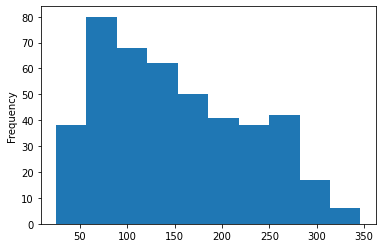

In [ ]:
df_diabetes['target'].plot(kind='hist')

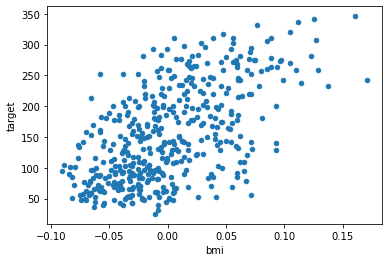

In [ ]:
df_diabetes.plot('bmi', 'target', kind='scatter')

In [ ]:
X = diabetes.data[:,[2]]
Y = diabetes.target

In [ ]:
X = df_diabetes[['bmi']].to_numpy()
y = df_diabetes['target'].to_numpy()

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)
print(model.coef_, model.intercept_)

[949.43526038] 152.1334841628967


In [ ]:
print(model.score(X, Y))

0.3439237602253803


In [ ]:
model.predict(np.array([[0.05], [-0.02]]))

array([199.60524718, 133.14477896])

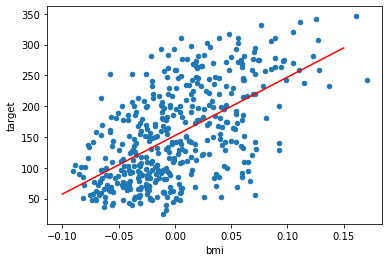

In [ ]:
df_diabetes.plot('bmi', 'target', kind='scatter')

bmi = np.linspace(-0.1, 0.15, 20).reshape(-1, 1)
plt.plot(bmi, model.predict(bmi), 'r')

## Classification

Another example of a machine learning problem is classification. Here we will use a dataset of flower measurements from three different flower species of *Iris* (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). We aim to predict the species of the flower. Because the species is not a numerical output, it is not a regression problem, but a classification problem.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris.data[:, :2]
y = iris.target_names[iris.target]

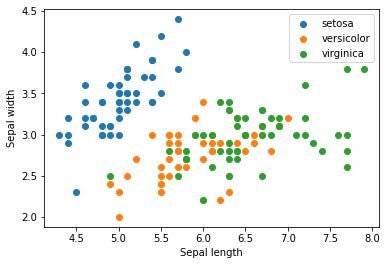

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend();

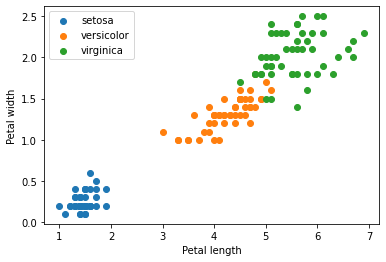

In [ ]:
X = iris.data[:, 2:]
y = iris.target_names[iris.target]
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend();

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.predict(X_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype='<U10')

### Evaluating your model

In [ ]:
np.mean(model.predict(X_test) == y_test)  # Accuracy

1.0

In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(model.predict(X_test), y_test)

1.0

In [ ]:
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png)

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [ ]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")

Accuracy: 0.9666666666666668 (+/- 0.02108185106778919)


## Clustering

Clustering is useful if we don't have a dataset labelled with the categories we want to predict, but we nevertheless expect there to be a certain number of categories. For example, suppose we have the previous dataset, but we are missing the labels. We can use a clustering algorithm like k-means to *cluster* the datapoints. Because we don't have labels, clustering is what is called an **unsupervised learning** algorithm.

In [ ]:
X = iris.data

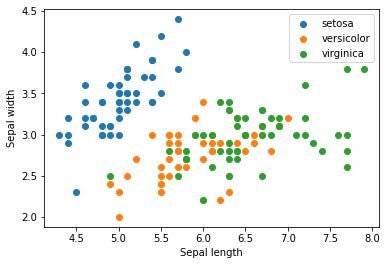

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
iris.target

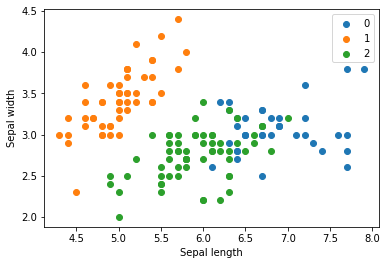

In [ ]:
for name in [0,1,2]:
    plt.scatter(X[model.labels_ == name, 0], X[model.labels_ == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

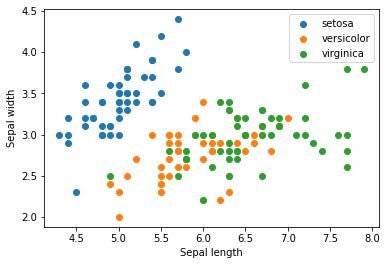

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

## Dimensionality reduction (PCA)

Dimensionality reduction is another unsupervised learning problem (that is, it does not require labels). It aims to project datapoints into a lower dimensional space while preserving distances between datapoints.

Lets take a look at the breast cancer dataset with dimensionality reduction

In [ ]:
bc = datasets.load_breast_cancer()

In [ ]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X = bc.data
Y = bc.target_names[bc.target]

In [ ]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

In [ ]:
np.mean(X,axis=0),np.std(X,axis=0)

(array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
         6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
        -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
         1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
         7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
        -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
        -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
        -2.28956670e-15,  2.57517109e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
X_PCA = pca_breast.fit_transform(X)

In [ ]:
pd.DataFrame(data = X_PCA, columns = ['pc_1', 'pc_2'])

,pc_1,pc_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


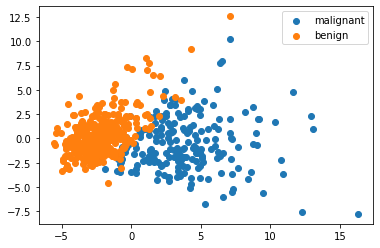

In [ ]:
for name in bc.target_names:
    plt.scatter(X_PCA[y == name, 0], X_PCA[y == name, 1], label=name)
plt.legend()

accuracy: 0.8882978723404256


[Text(167.4, 181.2, 'X[0] <= 0.432\ngini = 0.474\nsamples = 381\nvalue = [234, 147]'),
 Text(83.7, 108.72, 'X[0] <= -0.958\ngini = 0.125\nsamples = 238\nvalue = [222, 16]'),
 Text(41.85, 36.23999999999998, 'gini = 0.021\nsamples = 192\nvalue = [190, 2]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 3.409\ngini = 0.154\nsamples = 143\nvalue = [12, 131]'),
 Text(209.25, 36.23999999999998, 'gini = 0.06\nsamples = 129\nvalue = [4, 125]'),
 Text(292.95, 36.23999999999998, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]')]

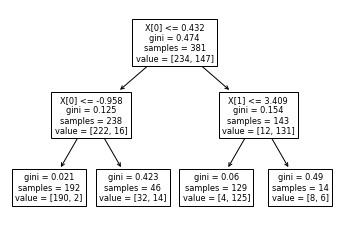

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.33,random_state=1)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train,y_train)
print('accuracy:', clf.score(x_test,y_test))
tree.plot_tree(clf)

In [ ]:
np.count_nonzero(y_train=='benign')

234